In [267]:
%matplotlib inline
import numpy as np
from sympy import nsolve, Symbol
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root


# NORMAL INCIDENCE

Constant Values Used

T1 is the temperature of surface exposed to Sun vector.

T2 is the temperature of the 4 adjacent surfaces.

T3 is the Temperature of the surface opposite to Exposed surface.

And in each case we expect  T1 > T2 > T3.


In [268]:


#shape factor
x = 0.2       

# in mesters length of edge
L = 1                 

# area of 1 face of cube
A = L**2              

#stiphan's constant (sigma)
si = 5.67e-8    

# epsilon
e = .8       

# absorptivity
a = 0.15   
#a = np.linspace(0, 1, 1000)

# thermal conductivity in SI units
k = 205      

# thickness of cube in meters
w = 0.01

# area of cross section for conduction
A0 = L*w              

# solar const
S = 1400              

# heat on each surface
h = 100               

def solar_flux(phi):
    e = a * S * np.cos(phi) *A
    return e

### Temperature for Aluminium 6061 case

Simply made a function which returns the governing equations for Temperature, and got a solution numerically using scipy.optimize.fsolve function which return the solution as a list.

In [269]:

def normal_incidence(T):
        # angle of incidence of sun vector on surface in degree
        phi_deg = 0       
        # in radian
        phi = np.deg2rad(phi_deg)       


        e_s1 = solar_flux(phi)

        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        f = [0,0,0]

        # surface 1 with normal incidence
        f[0] = (si*e*A + 5*x*A*si*e*a)* T1**4 + 4*(k*A0)/L * T1 - 4*x*A*si*e*a* T2**4 - 4*(k*A0)/L* T2 - x*A*si*e*a* T3**4 - (e_s1 + h)

        #surface 2 there are 4 such surfaces
        f[1] =  x*A*si*e*a* T1**4 + (k*A0)/L*T1 - (2*x*A*si*e*a + si*e*A)* T2**4 - 2*(k*A0)/L* T2 + x*A*si*e*a* T3**4 + (k*A0)/L* T3 + h

        #surface 3 opp to 1
        f[2] = x*A*si*e*a* T1**4 + 4*x*A*si*e*a* T2**4 + 4*(k*A0)/L* T2 - (5*x*A*si*e*a + si*e*A)* T3**4 - 4*(k*A0)/L* T3 +h

        return f
    
sol_Al = fsolve(normal_incidence, [250, 250, 250])

print(sol_Al)


[247.34883472 231.01376036 228.40680132]


### Variation with Thickness

To get the variation a for loop is created to itterate over values of thickness from 0 to 50mm, rest of the process is similar as above. It is evident that if we increase the thickness the conduction will increase, so we expect a decrease in T1, and increase in both T2 and T3.

Text(0.5, 1.0, 'Normal Incidence Temperature vs Thickness')

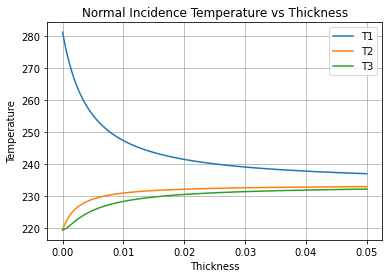

In [290]:

#Thickness im meters
w1 = np.linspace(0, 0.05, 100)

#Cross-section area for conduction
A2 = L*w1

s = []

for i in A2:
    
    def normal_incidence(T):
        # angle of incidence of sun vector on surface in degree
        phi_deg = 0       
        # in radian
        phi = np.deg2rad(phi_deg)       


        e_s1 = solar_flux(phi)

        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        f = [0,0,0]

        # surface 1 with normal incidence
        f[0] = (si*e*A + 5*x*A*si*e*a)* T1**4 + 4*(k*i)/L * T1 - 4*x*A*si*e*a* T2**4 - 4*(k*i)/L* T2 - x*A*si*e*a* T3**4 - (e_s1 + h)

        #surface 2 there are 4 such surfaces
        f[1] =  x*A*si*e*a* T1**4 + (k*i)/L*T1 - (2*x*A*si*e*a + si*e*A)* T2**4 - 2*(k*i)/L* T2 + x*A*si*e*a* T3**4 + (k*i)/L* T3 + h

        #surface 3 opp to 1
        f[2] = x*A*si*e*a* T1**4 + 4*x*A*si*e*a* T2**4 + 4*(k*i)/L* T2 - (5*x*A*si*e*a + si*e*A)* T3**4 - 4*(k*i)/L* T3 +h

        return f

    s.append(list(fsolve(normal_incidence, [250, 250, 250])))
    
sol_for_w = np.array(s)
    
#print(sol_for_w)

plt.plot(w1, sol_for_w[:,0])
plt.plot(w1, sol_for_w[:,1])
plt.plot(w1, sol_for_w[:,2])
plt.grid()
plt.xlabel('Thickness')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Normal Incidence Temperature vs Thickness")

## Variation of Temperature with Emissivity

Emissivity is varied from 0.05 to 1, we didn't initialise it from 0 because the function fsolve shows error for the value 0. The procedure is similar and as emissivity increases we have more heat energy going out of all surfaces so we expect a decrease in temperature of all 3 surfaces.

Text(0.5, 1.0, 'Normal Incidence Temperature vs Emissivity')

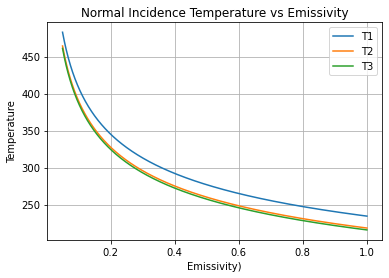

In [291]:

#fixed width of 10mm
W = 0.01
A1 = L*W

# Emissivity values
E = np.linspace(0.05, 1, 1000)

s = []

for i in E:
    
    def normal_incidence(T):
        # angle of incidence of sun vector on surface in degree
        phi_deg = 0       
        # in radian
        phi = np.deg2rad(phi_deg)       


        e_s1 = solar_flux(phi)

        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        f = [0,0,0]

        # surface 1 with normal incidence
        f[0] = (si*i*A + 5*x*A*si*i*a)* T1**4 + 4*(k*A1)/L * T1 - 4*x*A*si*i*a* T2**4 - 4*(k*A1)/L* T2 - x*A*si*i*a* T3**4 - (e_s1 + h)

        #surface 2 there are 4 such surfaces
        f[1] =  x*A*si*i*a* T1**4 + (k*A1)/L*T1 - (2*x*A*si*i*a + si*i*A)* T2**4 - 2*(k*A1)/L* T2 + x*A*si*i*a* T3**4 + (k*A1)/L* T3 + h

        #surface 3 opp to 1
        f[2] = x*A*si*i*a* T1**4 + 4*x*A*si*i*a* T2**4 + 4*(k*A1)/L* T2 - (5*x*A*si*i*a + si*i*A)* T3**4 - 4*(k*A1)/L* T3 +h

        return f

    s.append(list(fsolve(normal_incidence, [250, 250, 250])))
    
sol_for_e = np.array(s)
    
#print(sol_for_e)

plt.plot(E, sol_for_e[:,0])
plt.plot(E, sol_for_e[:,1])
plt.plot(E, sol_for_e[:,2])
plt.grid()
plt.xlabel('Emissivity)')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Normal Incidence Temperature vs Emissivity")

### Variation with Absorptivity

Absorptivity is varied from 0 to 1 and rest of the procedure is the same. As it's intuitive that with increase in absorptivity every surface will absorb more amount heat energy, we expect all surface temperatures to increase.  

Text(0.5, 1.0, 'Normal Incidence Temperature vs Absorptivity')

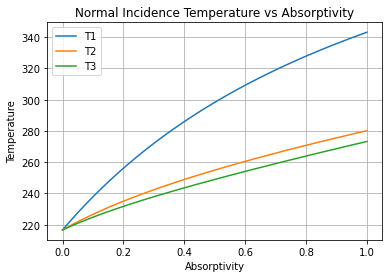

In [292]:

#fixed width of 10mm
W = 0.01
A1 = L*W
a1 = np.linspace(0, 1, 1000)


s = []

for i in a1:
    
    def normal_incidence(T):
        # angle of incidence of sun vector on surface in degree
        phi_deg = 0       
        # in radian
        phi = np.deg2rad(phi_deg)       


        e_s2 = i * S * np.cos(phi) *A

        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        f = [0,0,0]

        # surface 1 with normal incidence
        f[0] = (si*e*A + 5*x*A*si*e*i)* T1**4 + 4*(k*A1)/L * T1 - 4*x*A*si*e*i* T2**4 - 4*(k*A1)/L* T2 - x*A*si*e*i* T3**4 - (e_s2 + h)

        #surface 2 there are 4 such surfaces
        f[1] =  x*A*si*e*i* T1**4 + (k*A1)/L*T1 - (2*x*A*si*e*i + si*e*A)* T2**4 - 2*(k*A1)/L* T2 + x*A*si*e*i* T3**4 + (k*A1)/L* T3 + h

        #surface 3 opp to 1
        f[2] = x*A*si*e*i* T1**4 + 4*x*A*si*e*i* T2**4 + 4*(k*A1)/L* T2 - (5*x*A*si*e*i + si*e*A)* T3**4 - 4*(k*A1)/L* T3 +h

        return f

    s.append(list(fsolve(normal_incidence, [500, 500, 500])))
    
sol_for_a = np.array(s)
    
#print(sol_for_a)
plt.plot(a1, sol_for_a[:,0])
plt.plot(a1, sol_for_a[:,1])
plt.plot(a1, sol_for_a[:,2])
plt.grid()
plt.xlabel('Absorptivity')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Normal Incidence Temperature vs Absorptivity")

## Variation with Thermal Conductivity

With rest of the code being kept the same, K values are varied from 10 to 1000. Increase in K means more conduction, so the plot should be similar to that of variation with Thickness i.e. T1 should decrease, T2 and T3 both should increase. 

Text(0.5, 1.0, 'Normal Incidence Temperature vs Thermal Conductivity')

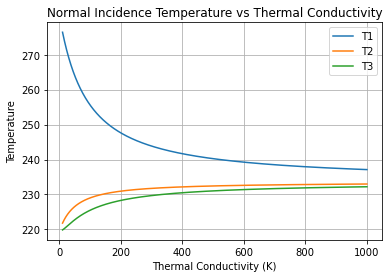

In [293]:

#fixed width of 10mm
W = 0.01
A1 = L*W

# Emissivity values
K = np.linspace(10, 1000, 10000)

s = []

for i in K:
    
    def normal_incidence(T):
        # angle of incidence of sun vector on surface in degree
        phi_deg = 0       
        # in radian
        phi = np.deg2rad(phi_deg)       


        e_s1 = solar_flux(phi)

        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        f = [0,0,0]

        # surface 1 with normal incidence
        f[0] = (si*e*A + 5*x*A*si*e*a)* T1**4 + 4*(i*A1)/L * T1 - 4*x*A*si*e*a* T2**4 - 4*(i*A1)/L* T2 - x*A*si*e*a* T3**4 - (e_s1 + h)

        #surface 2 there are 4 such surfaces
        f[1] =  x*A*si*e*a* T1**4 + (i*A1)/L*T1 - (2*x*A*si*e*a + si*e*A)* T2**4 - 2*(i*A1)/L* T2 + x*A*si*e*a* T3**4 + (i*A1)/L* T3 + h

        #surface 3 opp to 1
        f[2] = x*A*si*e*a* T1**4 + 4*x*A*si*e*a* T2**4 + 4*(i*A1)/L* T2 - (5*x*A*si*e*a + si*e*A)* T3**4 - 4*(i*A1)/L* T3 +h

        return f

    s.append(list(fsolve(normal_incidence, [250, 250, 250])))
    
sol_for_k = np.array(s)
    
#print(sol_for_k)
plt.plot(K, sol_for_k[:,0])
plt.plot(K, sol_for_k[:,1])
plt.plot(K, sol_for_k[:,2])
plt.grid()
plt.xlabel('Thermal Conductivity (K)')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Normal Incidence Temperature vs Thermal Conductivity")

## Variation of Temperature with a and e

Keeping the overall process the same absorptivity is varied from 0 to 1 and emissivity is varied from 0.05 to 1 simultaneously. We expect that for each value of 'a' the 3D plot should have a contour line similar to the plot of Temperature vs Emissivity. And similarly for each value of 'e' a contour line similar to plot of Temperature vs absorptivity. So for every 'a' the best solution should be when 'e' = 1 and for every 'e' when 'a' = 0. So the best solution will be corresponding to 'a'=0 and 'e'=1.

In [294]:
# NORMAL INCIDENCE FOR CHANGING Absorptivity a and Emissivity e

#fixed width of 10mm
W = 0.01
A1 = L*W

a1 = np.linspace(0, 1, 100)
e1 = np.linspace(0.05, 1, 100)

#per element in these is a array (sol for a particular a) that will be converted to list  
sol1 = []
sol2 = []
sol3 = []

for i in a1:
    
    s = []
    
    for j in e1:
        
        def normal_incidence(T):
            # angle of incidence of sun vector on surface in degree
            phi_deg = 0       
            # in radian
            phi = np.deg2rad(phi_deg)       


            e_s2 = i * S * np.cos(phi) *A

            T1 = T[0]
            T2 = T[1]
            T3 = T[2]

            f = [0,0,0]

            # surface 1 with normal incidence
            f[0] = (si*j*A + 5*x*A*si*j*i)* T1**4 + 4*(k*A1)/L * T1 - 4*x*A*si*j*i* T2**4 - 4*(k*A1)/L* T2 - x*A*si*j*i* T3**4 - (e_s2 + h)

            #surface 2 there are 4 such surfaces
            f[1] =  x*A*si*j*i* T1**4 + (k*A1)/L*T1 - (2*x*A*si*j*i + si*j*A)* T2**4 - 2*(k*A1)/L* T2 + x*A*si*j*i* T3**4 + (k*A1)/L* T3 + h

            #surface 3 opp to 1
            f[2] = x*A*si*j*i* T1**4 + 4*x*A*si*j*i* T2**4 + 4*(k*A1)/L* T2 - (5*x*A*si*j*i + si*j*A)* T3**4 - 4*(k*A1)/L* T3 +h

            return f

        s.append(list(fsolve(normal_incidence, [300, 300, 300])))

    sol_for_aParticular_a = np.array(s)
    sol1.append(list(sol_for_aParticular_a[:,0]))
    sol2.append(list(sol_for_aParticular_a[:,1]))
    sol3.append(list(sol_for_aParticular_a[:,2]))

sol_for_a_e_T1 = np.array(sol1)
sol_for_a_e_T2 = np.array(sol2)
sol_for_a_e_T3 = np.array(sol3)

#print(sol_for_a_e_T1)
#print(sol_for_a_e_T2)
#print(sol_for_a_e_T3)

#plt.plot(a1, sol_for_a[:,0])
#plt.plot(a1, sol_for_a[:,1])
#plt.plot(a1, sol_for_a[:,2])
#plt.xlabel('Absorptivity')
#plt.ylabel('Temperature')
#plt.legend(['T1', 'T2', 'T3'])
#plt.title("Normal Incidence Temperature vs Absorptivity")

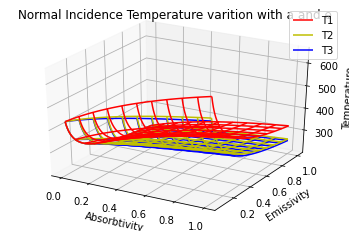

In [295]:
X,Y = np.meshgrid(a1,e1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Z1 = np.transpose(sol_for_a_e_T1)
Z2 = np.transpose(sol_for_a_e_T2)
Z3 = np.transpose(sol_for_a_e_T3)

ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=10, color = 'r')
ax.plot_wireframe(X, Y, Z2, rstride=10, cstride=10, color = 'y')
ax.plot_wireframe(X, Y, Z3, rstride=10, cstride=10, color = 'b')
plt.title('Normal Incidence Temperature varition with a and e')
plt.xlabel('Absorbtivity')
plt.ylabel('Emissivity')
ax.set_zlabel('Temperature')
ax.legend(['T1', 'T2', 'T3'])

## Variation of Temperature with K and e

The process of computaion being kept the same , thermal conductivity is varied from 10 to 1000 and e from 0.05 to 1 simultaneously. For each value of K we expect the temperature to go down with increase in e. Also for every value of K the contour line should be similar to plot of temperature vs emissivity and similarly for each e the contour line should look similar to Temperature vs K.

In [296]:
#fixed width of 10mm
W = 0.01
A1 = L*W

#a = 0.15

K1 = np.linspace(10, 1000, 100)
e2 = np.linspace(0.05, 1, 100)

#per element in these is a array (sol for a particular a) that will be converted to list  
solu1 = []
solu2 = []
solu3 = []

for i in K1:
    
    s1 = []
    
    for j in e2:
        
        def normal_incidence(T):
            # angle of incidence of sun vector on surface in degree
            phi_deg = 0       
            # in radian
            phi = np.deg2rad(phi_deg)       


            e_s3 = solar_flux(phi)

            T1 = T[0]
            T2 = T[1]
            T3 = T[2]

            f = [0,0,0]

            # surface 1 with normal incidence
            f[0] = (si*j*A + 5*x*A*si*j*a)* T1**4 + 4*(i*A1)/L * T1 - 4*x*A*si*j*a* T2**4 - 4*(i*A1)/L* T2 - x*A*si*j*a* T3**4 - (e_s3 + h)

            #surface 2 there are 4 such surfaces
            f[1] =  x*A*si*j*a* T1**4 + (i*A1)/L*T1 - (2*x*A*si*j*a + si*j*A)* T2**4 - 2*(i*A1)/L* T2 + x*A*si*j*a* T3**4 + (i*A1)/L* T3 + h

            #surface 3 opp to 1
            f[2] = x*A*si*j*a* T1**4 + 4*x*A*si*j*a* T2**4 + 4*(i*A1)/L* T2 - (5*x*A*si*j*a + si*j*A)* T3**4 - 4*(i*A1)/L* T3 +h

            return f

        s1.append(list(fsolve(normal_incidence, [300, 300, 300])))

    sol_for_aParticular_K = np.array(s1)
    
    solu1.append(list(sol_for_aParticular_K[:,0]))
    solu2.append(list(sol_for_aParticular_K[:,1]))
    solu3.append(list(sol_for_aParticular_K[:,2]))

sol_for_K_e_T1 = np.array(solu1)
sol_for_K_e_T2 = np.array(solu2)
sol_for_K_e_T3 = np.array(solu3)

#print(sol_for_K_e_T1)
#print(sol_for_K_e_T2)
#print(sol_for_K_e_T3)

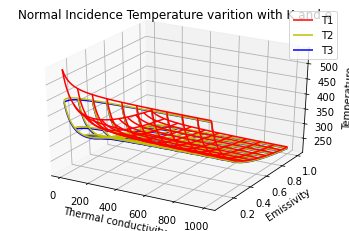

In [297]:
X1,Y1 = np.meshgrid(K1,e2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z1 = np.transpose(sol_for_K_e_T1)
z2 = np.transpose(sol_for_K_e_T2)
z3 = np.transpose(sol_for_K_e_T3)

ax.plot_wireframe(X1, Y1, z1, rstride=10, cstride=10, color = 'r')
ax.plot_wireframe(X1, Y1, z2, rstride=10, cstride=10, color = 'y')
ax.plot_wireframe(X1, Y1, z3, rstride=10, cstride=10, color = 'b')
plt.title('Normal Incidence Temperature varition with K and e')
plt.xlabel('Thermal conductivity')
plt.ylabel('Emissivity')
ax.set_zlabel('Temperature')
ax.legend(['T1', 'T2', 'T3'])

# INCIDENCE ON A EDGE (45 deg to face)

## Temperature for Aluminium 6061 case

The constants used are the same.

T1 is the temperature of face exposed to sun vector.

T2 is of the faces opposite to T1.

T3 is of surfaces in between these two.

In every case here we expect that T1 > T3 > T2.

In [298]:
# NORMAL INCIDENCE TO EGDE

#  angle of incidence of sun vector on surface in degree
phi_deg2 = 45 
# in radian
phi2 = np.deg2rad(phi_deg2)     


e_s4 = solar_flux(phi2)

def normal_to_egde_eq(T):
    T1 = T[0]
    T2 = T[1]
    T3 = T[2]
    
    F = [0,0,0]
    
    #surface exposed
    F[0] = (4*x*A*si*e*a + si*e*A)* T1**4 + 3*(k*A0/L)* T1 - 2*x*A*si*e*a* T2**4 - (k*A0/L)* T2 - 2*x*A*si*e*a* T3**4 - 2*(k*A0/L)* T3 - (e_s4 + h)
    
    #surface in between
    F[1] = 2*x*A*si*e*a* T1**4 + 2*(k*A0/L)* T1 + 2*x*A*si*e*a* T2**4 + 2*(k*A0/L)* T2 - (4*x*A*si*e*a + si*e*A)* T3**4 - 4*(k*A0/L)* T3 + h
    
    #surface farthest
    F[2] = 2*x*A*si*e*a* T1**4 + (k*A0/L)* T1 - (4*x*A*si*e*a + si*e*A)* T2**4 - 3*(k*A0/L)* T2 + 2*x*A*si*e*a* T3**4 + 2*(k*A0/L)* T3 + h
    
    return F
    
#solver
solution2  = fsolve(normal_to_egde_eq, [250, 250, 250])

print(solution2)

[247.62293806 234.36334819 236.16492618]


## Variation with Thickness

It is evident that if we increase the thickness the conduction will increase, so we expect a decrease in T1, and increase in both T2 and T3.

Text(0.5, 1.0, 'Temperature vs Thickness')

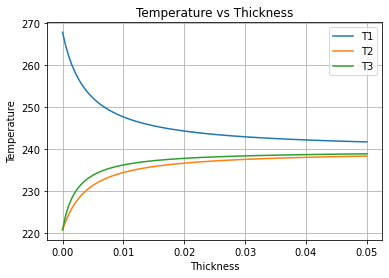

In [299]:
#Thickness im meters
w2 = np.linspace(0, 0.05, 100)

#Cross-section area for conduction
A3 = L*w2

s3 = []

for i in A3:
    
    def normal_to_egde_eq(T):
        
        #  angle of incidence of sun vector on surface in degree
        phi_deg2 = 45 
        # in radian
        phi2 = np.deg2rad(phi_deg2)     

        e_s4 = solar_flux(phi2)
        
        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        F = [0,0,0]

        #surface exposed
        F[0] = (4*x*A*si*e*a + si*e*A)* T1**4 + 3*(k*i/L)* T1 - 2*x*A*si*e*a* T2**4 - (k*i/L)* T2 - 2*x*A*si*e*a* T3**4 - 2*(k*i/L)* T3 - (e_s4 + h)

        #surface in between
        F[1] = 2*x*A*si*e*a* T1**4 + 2*(k*i/L)* T1 + 2*x*A*si*e*a* T2**4 + 2*(k*i/L)* T2 - (4*x*A*si*e*a + si*e*A)* T3**4 - 4*(k*i/L)* T3 + h

        #surface farthest
        F[2] = 2*x*A*si*e*a* T1**4 + (k*i/L)* T1 - (4*x*A*si*e*a + si*e*A)* T2**4 - 3*(k*i/L)* T2 + 2*x*A*si*e*a* T3**4 + 2*(k*i/L)* T3 + h

        return F

    s3.append(list(fsolve(normal_to_egde_eq, [250, 250, 250])))
    
sol_for_w1 = np.array(s3)
    
#print(sol_for_w1)

plt.plot(w2, sol_for_w1[:,0])
plt.plot(w2, sol_for_w1[:,1])
plt.plot(w2, sol_for_w1[:,2])
plt.grid()
plt.xlabel('Thickness')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Temperature vs Thickness")

## Variation of Temperature with Emissivity

Emissivity is varied from 0.05 to 1 and as emissivity increases we have more heat energy going out of all surfaces so we expect a decrease in temperature of all 3 surfaces.

Text(0.5, 1.0, 'Temperature vs Emissivity')

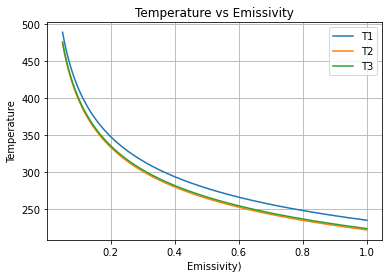

In [300]:
# Emissivity values
E1 = np.linspace(0.05, 1, 1000)

s4 = []

for i in E1:
    
    def normal_to_egde_eq(T):
        
        #  angle of incidence of sun vector on surface in degree
        phi_deg2 = 45 
        # in radian
        phi2 = np.deg2rad(phi_deg2)     

        e_s4 = solar_flux(phi2)
        
        T1 = T[0]
        T2 = T[1]
        T3 = T[2]

        F = [0,0,0]

        #surface exposed
        F[0] = (4*x*A*si*i*a + si*i*A)* T1**4 + 3*(k*A0/L)* T1 - 2*x*A*si*i*a* T2**4 - (k*A0/L)* T2 - 2*x*A*si*i*a* T3**4 - 2*(k*A0/L)* T3 - (e_s4 + h)

        #surface in between
        F[1] = 2*x*A*si*i*a* T1**4 + 2*(k*A0/L)* T1 + 2*x*A*si*i*a* T2**4 + 2*(k*A0/L)* T2 - (4*x*A*si*i*a + si*i*A)* T3**4 - 4*(k*A0/L)* T3 + h

        #surface farthest
        F[2] = 2*x*A*si*i*a* T1**4 + (k*A0/L)* T1 - (4*x*A*si*i*a + si*i*A)* T2**4 - 3*(k*A0/L)* T2 + 2*x*A*si*i*a* T3**4 + 2*(k*A0/L)* T3 + h

        return F

    s4.append(list(fsolve(normal_to_egde_eq, [250, 250, 250])))
    
sol_for_e1 = np.array(s4)
    
#print(sol_for_e1)

plt.plot(E1, sol_for_e1[:,0])
plt.plot(E1, sol_for_e1[:,1])
plt.plot(E1, sol_for_e1[:,2])
plt.grid()
plt.xlabel('Emissivity)')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Temperature vs Emissivity")

## Variation with Absorptivity

With increase in absorptivity every surface will absorb more amount heat energy, we expect all surface temperatures to increase.

Text(0.5, 1.0, 'Temperature vs Absorptivity')

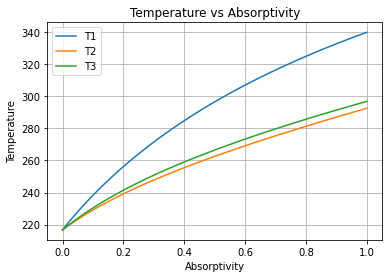

In [301]:
# Aborsptivity varied from 0 to 1
a2 = np.linspace(0, 1, 1000)

s5 = []

for i in a2:
    
    def normal_to_egde_eq(T):

            #  angle of incidence of sun vector on surface in degree
            phi_deg2 = 45 
            # in radian
            phi2 = np.deg2rad(phi_deg2)     

            e_s4 = i* S* np.cos(phi2) *A

            T1 = T[0]
            T2 = T[1]
            T3 = T[2]

            F = [0,0,0]

            #surface exposed
            F[0] = (4*x*A*si*e*i + si*e*A)* T1**4 + 3*(k*A0/L)* T1 - 2*x*A*si*e*i* T2**4 - (k*A0/L)* T2 - 2*x*A*si*e*i* T3**4 - 2*(k*A0/L)* T3 - (e_s4 + h)

            #surface in between
            F[1] = 2*x*A*si*e*i* T1**4 + 2*(k*A0/L)* T1 + 2*x*A*si*e*i* T2**4 + 2*(k*A0/L)* T2 - (4*x*A*si*e*i + si*e*A)* T3**4 - 4*(k*A0/L)* T3 + h

            #surface farthest
            F[2] = 2*x*A*si*e*i* T1**4 + (k*A0/L)* T1 - (4*x*A*si*e*i + si*e*A)* T2**4 - 3*(k*A0/L)* T2 + 2*x*A*si*e*i* T3**4 + 2*(k*A0/L)* T3 + h

            return F

    s5.append(list(fsolve(normal_to_egde_eq, [250, 250, 250])))

sol_for_a1 = np.array(s5)
    
#print(sol_for_a1)

plt.plot(a2, sol_for_a1[:,0])
plt.plot(a2, sol_for_a1[:,1])
plt.plot(a2, sol_for_a1[:,2])
plt.grid()
plt.xlabel('Absorptivity')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Temperature vs Absorptivity")

## Variation with Thermal Conductivity

Increase in K means more conduction, so the plot should be similar to that of variation with Thickness i.e. T1 should decrease, T2 and T3 both should increase.

Text(0.5, 1.0, 'Temperature vs Thermal Conductivity')

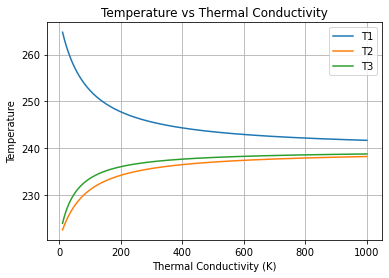

In [302]:
# Emissivity values
K2 = np.linspace(10, 1000, 10000)

s6 = []

for i in K2:
    
    def normal_to_egde_eq(T):

            #  angle of incidence of sun vector on surface in degree
            phi_deg2 = 45 
            # in radian
            phi2 = np.deg2rad(phi_deg2)     

            e_s4 = solar_flux(phi2)

            T1 = T[0]
            T2 = T[1]
            T3 = T[2]

            F = [0,0,0]

            #surface exposed
            F[0] = (4*x*A*si*e*a + si*e*A)* T1**4 + 3*(i*A0/L)* T1 - 2*x*A*si*e*a* T2**4 - (i*A0/L)* T2 - 2*x*A*si*e*a* T3**4 - 2*(i*A0/L)* T3 - (e_s4 + h)

            #surface in between
            F[1] = 2*x*A*si*e*a* T1**4 + 2*(i*A0/L)* T1 + 2*x*A*si*e*a* T2**4 + 2*(i*A0/L)* T2 - (4*x*A*si*e*a + si*e*A)* T3**4 - 4*(i*A0/L)* T3 + h

            #surface farthest
            F[2] = 2*x*A*si*e*a* T1**4 + (i*A0/L)* T1 - (4*x*A*si*e*a + si*e*A)* T2**4 - 3*(i*A0/L)* T2 + 2*x*A*si*e*a* T3**4 + 2*(i*A0/L)* T3 + h

            return F

    s6.append(list(fsolve(normal_to_egde_eq, [250, 250, 250])))


    
sol_for_k1 = np.array(s6)
    
#print(sol_for_k1)
plt.plot(K2, sol_for_k1[:,0])
plt.plot(K2, sol_for_k1[:,1])
plt.plot(K2, sol_for_k1[:,2])
plt.grid()
plt.xlabel('Thermal Conductivity (K)')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2', 'T3'])
plt.title("Temperature vs Thermal Conductivity")

# INCIDENCE ALONG BODY DIAGONAL (54.74 deg to faces)

## Temperature for Aluminium 6061 case

The constants used are the same.

T1 is the temperature of faces exposed to sun vector.

T2 is of the faces opposite to T1.

In every case here we expect T1 > T2.

In [303]:
# angle of incidence of sun vector on surface in degree
phi_deg3 = 54.74  
# in radian
phi3 = np.deg2rad(phi_deg3)          


e_s5 = solar_flux(phi3)

def body_diagonal_eq(T):
    T1 = T[0]
    T2 = T[1]
    
    f = [0,0]
    
    # exposed surface
    f[0] = (3*x*A*si*e*a + si*e*A)* T1**4 +2*(k*A0/L)* T1 - 3*x*A*si*e*a* T2**4 - 2*(k*A0/L)* T2 - (e_s5 + h)
    
    # far surfaces
    f[1] = 3*x*A*si*e*a* T1**4 + 2*(k*A0/L)* T1 - (3*x*A*si*e*a + si*e*A)* T2**4 - 2*(k*A0/L)* T2 + h
    
    return f

#solver
solution3  = fsolve(body_diagonal_eq, [250, 250])

print( solution3 )

[249.12357835 238.39762245]


## Variation with Thickness

It is evident that if we increase the thickness the conduction will increase, so we expect a decrease in T1, and increase in T2. 

Text(0.5, 1.0, 'Temperature vs Thickness')

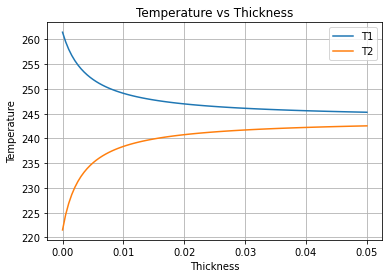

In [304]:
#Thickness im meters
w3 = np.linspace(0, 0.05, 100)

#Cross-section area for conduction
A4 = L*w3

s7 = []

for i in A4:

    def body_diagonal_eq(T):
        
        # angle of incidence of sun vector on surface in degree
        phi_deg3 = 54.74  
        # in radian
        phi3 = np.deg2rad(phi_deg3)          


        e_s5 = solar_flux(phi3)
        
        T1 = T[0]
        T2 = T[1]

        f = [0,0]

        # exposed surface
        f[0] = (3*x*A*si*e*a + si*e*A)* T1**4 +2*(k*i/L)* T1 - 3*x*A*si*e*a* T2**4 - 2*(k*i/L)* T2 - (e_s5 + h)

        # far surfaces
        f[1] = 3*x*A*si*e*a* T1**4 + 2*(k*i/L)* T1 - (3*x*A*si*e*a + si*e*A)* T2**4 - 2*(k*i/L)* T2 + h

        return f

    s7.append(list(fsolve(body_diagonal_eq, [250, 250])))
    
sol_for_w2 = np.array(s7)
    
#print(sol_for_w2)

plt.plot(w3, sol_for_w2[:,0])
plt.plot(w3, sol_for_w2[:,1])
plt.grid()
plt.xlabel('Thickness')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2'])
plt.title("Temperature vs Thickness")

## Variation of Temperature with Emissivity

As emissivity increases we have more heat energy going out of all surfaces so we expect a decrease in temperature of both the surfaces.

Text(0.5, 1.0, 'Temperature vs Emissivity')

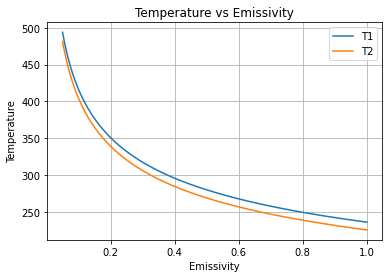

In [305]:
# Emissivity values
E2 = np.linspace(0.05, 1, 1000)

s8 = []

for i in E2:
        
        def body_diagonal_eq(T):
            
            # angle of incidence of sun vector on surface in degree
            phi_deg3 = 54.74  
            # in radian
            phi3 = np.deg2rad(phi_deg3)          


            e_s5 = solar_flux(phi3)
            
            T1 = T[0]
            T2 = T[1]

            f = [0,0]

            # exposed surface
            f[0] = (3*x*A*si*i*a + si*i*A)* T1**4 +2*(k*A0/L)* T1 - 3*x*A*si*i*a* T2**4 - 2*(k*A0/L)* T2 - (e_s5 + h)

            # far surfaces
            f[1] = 3*x*A*si*i*a* T1**4 + 2*(k*A0/L)* T1 - (3*x*A*si*i*a + si*i*A)* T2**4 - 2*(k*A0/L)* T2 + h

            return f

        s8.append(list(fsolve(body_diagonal_eq, [250, 250])))
    
sol_for_e2 = np.array(s8)
    
#print(sol_for_e2)
    
plt.plot(E2, sol_for_e2[:,0])
plt.plot(E2, sol_for_e2[:,1])
plt.grid()
plt.xlabel('Emissivity')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2'])
plt.title("Temperature vs Emissivity")

## Variation with Absorptivity

With increase in absorptivity every surface will absorb more amount heat energy, we expect all surface temperatures to increase.

Text(0.5, 1.0, 'Temperature vs Absorptivity')

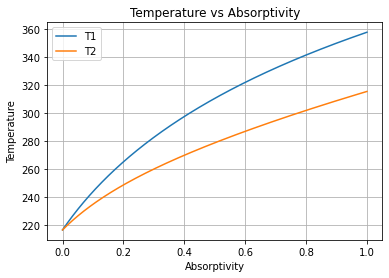

In [306]:
# Aborsptivity varied from 0 to 1
a3 = np.linspace(0, 1, 1000)

s9 = []

for i in a3:
    
        def body_diagonal_eq(T):
            
            # angle of incidence of sun vector on surface in degree
            phi_deg3 = 54.74  
            # in radian
            phi3 = np.deg2rad(phi_deg3)          


            e_s5 = i* S* np.cos(phi2) *A
            
            T1 = T[0]
            T2 = T[1]

            f = [0,0]

            # exposed surface
            f[0] = (3*x*A*si*e*i + si*e*A)* T1**4 +2*(k*A0/L)* T1 - 3*x*A*si*e*i* T2**4 - 2*(k*A0/L)* T2 - (e_s5 + h)

            # far surfaces
            f[1] = 3*x*A*si*e*i* T1**4 + 2*(k*A0/L)* T1 - (3*x*A*si*e*i + si*e*A)* T2**4 - 2*(k*A0/L)* T2 + h

            return f

        s9.append(list(fsolve(body_diagonal_eq, [250, 250])))

sol_for_a2 = np.array(s9)
    
#print(sol_for_a2)

plt.plot(a3, sol_for_a2[:,0])
plt.plot(a3, sol_for_a2[:,1])
plt.grid()
plt.xlabel('Absorptivity')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2'])
plt.title("Temperature vs Absorptivity")

## Variation with Thermal Conductivity

Increase in K means more conduction, so the plot should be similar to that of variation with Thickness i.e. T1 should decrease and T2 should increase.

Text(0.5, 1.0, 'Temperature vs Thermal Conductivity')

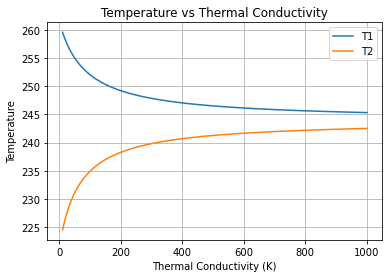

In [307]:
# Emissivity values
K3 = np.linspace(10, 1000, 10000)

s0 = []

for i in K3:
    
        def body_diagonal_eq(T):
            
            # angle of incidence of sun vector on surface in degree
            phi_deg3 = 54.74  
            # in radian
            phi3 = np.deg2rad(phi_deg3)          


            e_s5 = solar_flux(phi3)
            
            T1 = T[0]
            T2 = T[1]

            f = [0,0]

            # exposed surface
            f[0] = (3*x*A*si*e*a + si*e*A)* T1**4 + 2*(i*A0/L)* T1 - 3*x*A*si*e*a* T2**4 - 2*(i*A0/L)* T2 - (e_s5 + h)

            # far surfaces
            f[1] = 3*x*A*si*e*a* T1**4 + 2*(i*A0/L)* T1 - (3*x*A*si*e*a + si*e*A)* T2**4 - 2*(i*A0/L)* T2 + h

            return f

        s0.append(list(fsolve(body_diagonal_eq, [250, 250])))


    
sol_for_k2 = np.array(s0)
    
#print(sol_for_k2)
plt.plot(K3, sol_for_k2[:,0])
plt.plot(K3, sol_for_k2[:,1])
plt.grid()
plt.xlabel('Thermal Conductivity (K)')
plt.ylabel('Temperature')
plt.legend(['T1', 'T2'])
plt.title("Temperature vs Thermal Conductivity")